**Shapely Geometry & Spatial Operations**

1.0 3.0


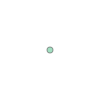

In [ ]:
from shapely.geometry import Point

p=Point(1,3)
print(p.x,p.y)
p


2.8284271247461903


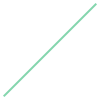

In [ ]:
from shapely.geometry import LineString
l=LineString([(0,0),(1,1),(2,2)])
print(l.length)
l

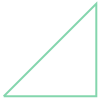

In [ ]:
#LinearRing
# A closed loop line (start and end points are the same). Used internally to define polygon boundaries.
from shapely.geometry import LinearRing

ring = LinearRing([(0, 0), (1, 1), (1, 0), (0, 0)])
ring

1.0


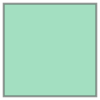

In [ ]:
 #Polygon Represents an area enclosed by a boundary. Can also have holes.
from shapely.geometry import Polygon

poly=Polygon([(0,0),(1,0),(1,1),(0,1)])
print(poly.area)
poly

32.0


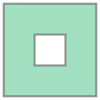

In [ ]:
# With hole
hole = Polygon(
    shell=[(0, 0), (6, 0), (6, 6), (0, 6)],
    holes=[[(2, 2), (4, 2), (4, 4), (2, 4)]]
)
print(hole.area)
hole

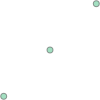

In [ ]:
#MultiPoint A collection of points.

from shapely.geometry import MultiPoint

mp = MultiPoint([(1, 1), (2, 2), (3, 3)])
mp

In [ ]:
import geopandas as gpd
df_shapley =gpd.GeoSeries([p,l,mp,poly,ring])
df_shapley

,0
0,POINT (1 3)
1,"LINESTRING (0 0, 1 1, 2 2)"
2,"MULTIPOINT ((1 1), (2 2), (3 3))"
3,"POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0))"
4,"LINEARRING (0 0, 1 1, 1 0, 0 0)"


<Axes: >

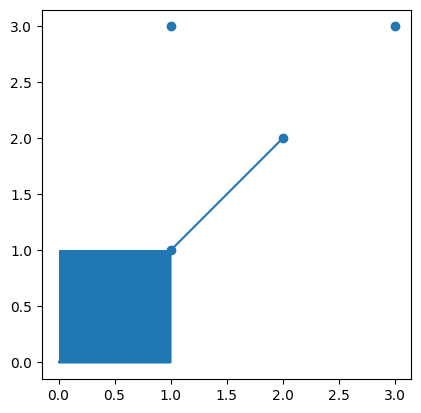

In [ ]:
df_shapley.plot()

In [ ]:
#Program to check whether Point exits in polygon or not using .contain
#contains():Check if a geometry completely contains another.
from shapely.geometry import Point, Polygon

point1 = Point(1, 1)
point2=Point(3,3)

polygon = Polygon([(0, 0), (0, 2), (2, 2), (2, 0)])

print(polygon.contains(point1))
print(polygon.contains(point2))

True
False


In [ ]:
#within():Checks if one geometry is within another.
print("Point is within Polygon:", point1.within(polygon))
print("Point is outside Polygon:", point2.within(polygon))

Point is within Polygon: True
Point is outside Polygon: False


POLYGON ((4 3, 3.995184726672197 2.9019828596704396, 3.9807852804032304 2.8049096779838716, 3.9569403357322086 2.7097153227455375, 3.923879532511287 2.6173165676349104, 3.881921264348355 2.5286032631740025, 3.8314696123025453 2.444429766980398, 3.773010453362737 2.3656067158363543, 3.7071067811865475 2.2928932188134525, 3.6343932841636457 2.226989546637263, 3.555570233019602 2.1685303876974547, 3.471396736825998 2.118078735651645, 3.3826834323650896 2.076120467488713, 3.2902846772544625 2.043059664267791, 3.1950903220161284 2.0192147195967696, 3.098017140329561 2.0048152733278033, 3 2, 2.9019828596704396 2.004815273327803, 2.804909677983872 2.0192147195967696, 2.709715322745538 2.043059664267791, 2.6173165676349104 2.076120467488713, 2.528603263174002 2.118078735651645, 2.444429766980398 2.1685303876974547, 2.3656067158363547 2.226989546637263, 2.2928932188134525 2.2928932188134525, 2.226989546637263 2.3656067158363543, 2.1685303876974547 2.444429766980398, 2.118078735651645 2.52860326

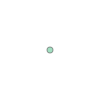

In [ ]:
#buffer() – Create a region around a point/line/polygon
from shapely.geometry import Point

point = Point(3, 3)
buffer_zone = point.buffer(1.0)  # 1 unit buffer radius

print(buffer_zone)
point

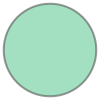

In [ ]:
buffer_zone

GeometryCollection: GEOMETRYCOLLECTION (POINT (1 3), LINESTRING (0 0, 1 1, 2 2), POLYGON ((0 0, 1 0, 1 1, 0 1, 0 0)))


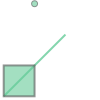

In [ ]:
from shapely.geometry import GeometryCollection
geom_collection = GeometryCollection([p, l, poly])
print("GeometryCollection:", geom_collection)
geom_collection

In [29]:
#distance():->Calculates the distance between two geometries.
from shapely.geometry import Point

point = Point(2,3)
another_point = Point(4, 5)
print("Distance:", point.distance(another_point))

Distance: 2.8284271247461903


In [30]:
#intersects()->checks if two geometries touch or overlap in any way.
polygon2 = Polygon([(0, 0), (4, 0), (4, 3), (0, 3)])

line2 = LineString([(0, 0), (5, 5)])
print("Line intersects Polygon:", line2.intersects(polygon2))



Line intersects Polygon: True


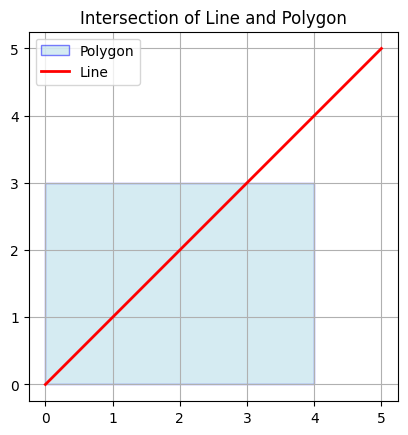

In [31]:
import matplotlib.pyplot as plt
# Plot
fig, ax = plt.subplots()
# Plot polygon
x, y = polygon2.exterior.xy
ax.fill(x, y, alpha=0.5, fc='lightblue', ec='blue', label='Polygon')

# Plot line
x_line, y_line = line2.xy
ax.plot(x_line, y_line, color='red', linewidth=2, label='Line')

# Customize plot
ax.set_title("Intersection of Line and Polygon")
ax.legend()
ax.set_aspect('equal')
plt.grid(True)
plt.show()


In [33]:
#Program to check whether Point exits in polygon or not using .contain
from shapely.geometry import Point, Polygon

# Define the park boundary (Polygon)
park_boundary = Polygon([
    (0, 0), (0, 10), (10, 10), (10, 0)
])

# Wildlife sightings as points
sightings = [
    Point(1, 1),
    Point(12, 8),
    Point(0, 0),     # on the boundary
    Point(13,12)# on the corner
]

# Check which sightings are inside the park
for i, sighting in enumerate(sightings):
    if park_boundary.contains(sighting):
        print(f"Sighting {i+1} is INSIDE the park")
    else:
        print(f"Sighting {i+1} is OUTSIDE or ON the boundary")
#.contains() only returns True if the point is strictly inside (not on the boundary). To include boundary points, use .cove

Sighting 1 is INSIDE the park
Sighting 2 is OUTSIDE or ON the boundary
Sighting 3 is OUTSIDE or ON the boundary
Sighting 4 is OUTSIDE or ON the boundary
